In [1]:
from knowledge_graphs.keyword_extraction import extract_keywords_keybert, extract_keywords_tfidf
from knowledge_graphs.relationship_extraction import extract_relationships
from knowledge_graphs.networkx_graph import build_knowledge_graph
from knowledge_graphs.neo4j_graph import KnowledgeGraphNeo4j

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
documents = [
    "Artificial intelligence is intelligence demonstrated by machines.",
    "Machine learning is a subset of AI focused on the development of algorithms.",
    "Deep learning is a subset of machine learning involving neural networks."
]
print("TFIDF:", extract_keywords_tfidf(documents))
print("KEYBERT:", extract_keywords_keybert(documents))

TFIDF: {'Document_1': ['intelligence', 'machines', 'demonstrated', 'artificial', 'subset'], 'Document_2': ['focused', 'development', 'algorithms', 'ai', 'subset'], 'Document_3': ['learning', 'neural', 'networks', 'involving', 'deep']}
KEYBERT: {'Document_1': ['artificial intelligence', 'demonstrated machines', 'intelligence demonstrated', 'intelligence intelligence', 'machines'], 'Document_2': ['machine learning', 'ai', 'subset ai', 'ai focused', 'development algorithms'], 'Document_3': ['deep learning', 'neural networks', 'neural', 'machine learning', 'deep']}


In [3]:
# Example usage
keywords = extract_keywords_tfidf(documents)
relationships = extract_relationships(documents, keywords)
print(relationships)

defaultdict(<class 'list'>, {'intelligence': ['machines', 'demonstrated', 'artificial', 'subset'], 'machines': ['intelligence', 'demonstrated', 'artificial', 'subset'], 'demonstrated': ['intelligence', 'machines', 'artificial', 'subset'], 'artificial': ['intelligence', 'machines', 'demonstrated', 'subset'], 'subset': ['intelligence', 'machines', 'demonstrated', 'artificial', 'focused', 'development', 'algorithms', 'ai'], 'focused': ['development', 'algorithms', 'ai', 'subset'], 'development': ['focused', 'algorithms', 'ai', 'subset'], 'algorithms': ['focused', 'development', 'ai', 'subset'], 'ai': ['focused', 'development', 'algorithms', 'subset'], 'learning': ['neural', 'networks', 'involving', 'deep'], 'neural': ['learning', 'networks', 'involving', 'deep'], 'networks': ['learning', 'neural', 'involving', 'deep'], 'involving': ['learning', 'neural', 'networks', 'deep'], 'deep': ['learning', 'neural', 'networks', 'involving']})


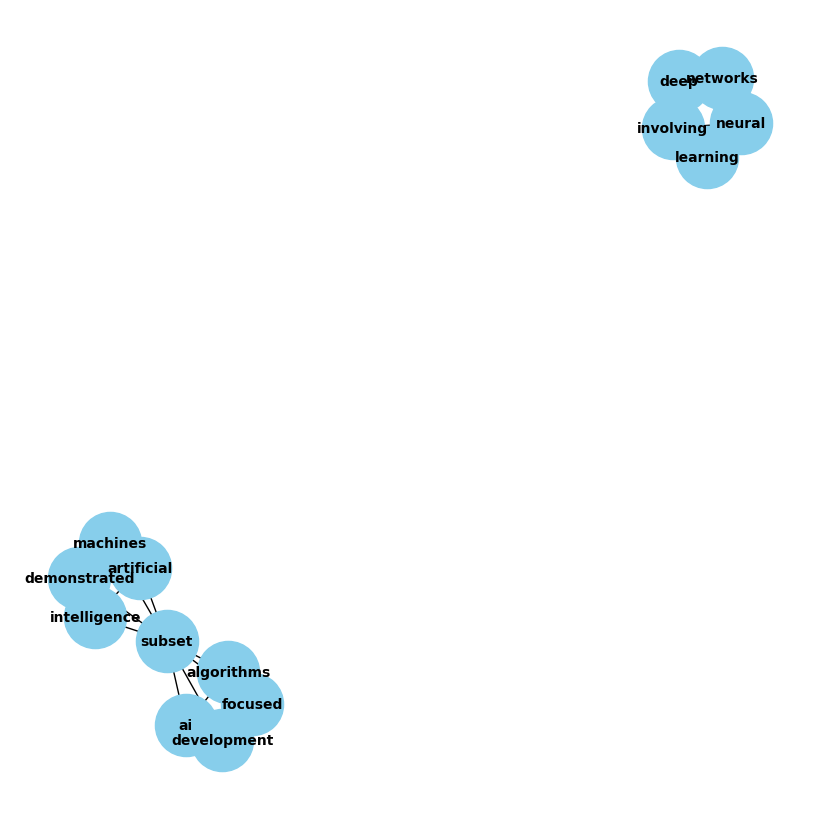

In [4]:
build_knowledge_graph(relationships)

In [5]:
# Example usage

from neo4j import GraphDatabase
import os
neo4j_uri = os.getenv("NEO4J_URI", "bolt://neo4j:7687")
neo4j_user = os.getenv("NEO4J_USER", "neo4j")
neo4j_password = os.getenv("NEO4J_PASSWORD", "password")

# Example usage
kg = KnowledgeGraphNeo4j(neo4j_uri, "neo4j", "password")

for keyword, related_keywords in relationships.items():
    kg.create_node_and_relationships(keyword, related_keywords)

kg.close()

In [6]:
from neo4j import GraphDatabase
import os

# Use the service name defined in docker-compose.yml instead of localhost
neo4j_uri = os.getenv("NEO4J_URI", "bolt://neo4j:7687")  # Use "neo4j" instead of "localhost"
neo4j_user = os.getenv("NEO4J_USER", "neo4j")
neo4j_password = os.getenv("NEO4J_PASSWORD", "password")

# Initialize the driver
driver = GraphDatabase.driver(neo4j_uri, auth=(neo4j_user, neo4j_password))

# Create a session and run a test query
with driver.session() as session:
    result = session.run("MATCH (n) RETURN n LIMIT 5")
    for record in result:
        print(record)

<Record n=<Node element_id='0' labels=frozenset({'Keyword'}) properties={'name': 'intelligence'}>>
<Record n=<Node element_id='1' labels=frozenset({'Keyword'}) properties={'name': 'machines'}>>
<Record n=<Node element_id='2' labels=frozenset({'Keyword'}) properties={'name': 'demonstrated'}>>
<Record n=<Node element_id='3' labels=frozenset({'Keyword'}) properties={'name': 'artificial'}>>
<Record n=<Node element_id='4' labels=frozenset({'Keyword'}) properties={'name': 'subset'}>>
